In [16]:
from pathlib import Path
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from fibrosisanalysis.parsers.image_loader import ImageLoader


class ImageParser:
    def __init__(self):
        pass

    @staticmethod
    def read_png(path):
        image = io.imread(path, as_gray=True)
        return np.add(image < 0.4, image < 0.8, dtype=int)

    @staticmethod
    def write_png(image, path):
        fib = [153, 1, 2]
        myo = [226, 168, 88]

        out_image = np.zeros((image.shape[0], image.shape[1], 3),
                             dtype=np.uint8)
        out_image[image == 1] = myo
        out_image[image == 2] = fib
        io.imsave(path, out_image)


path = Path('/Users/arstanbek/Library/CloudStorage/OneDrive-UGent/data')

heart = 'E11444_LMNA'
slice_name = 'E11444_08_SC2'

image_loader = ImageLoader(path)
max_shape = np.zeros(2)
images = []

for i in range(5, 10):
    slice_name = f'E11444_0{i}_SC2'
    image = image_loader.load_slice_data(path.joinpath(heart, 'Images',
                                                       slice_name))
    max_shape = np.maximum(max_shape, image.shape)
    images.append(image)


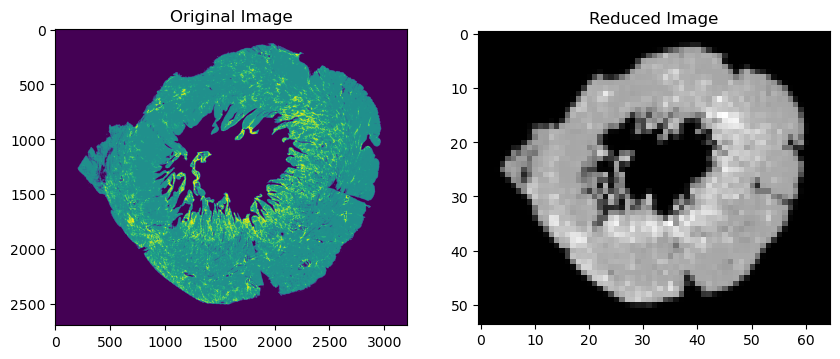

In [17]:
from skimage.transform import pyramid_reduce


scale_factor = 0.02  # Reduce size by 50% per level (adjust as needed)

def reduce_image(img, scale=0.5):
    """ Reduce image size using skimage Gaussian pyramid. """
    return pyramid_reduce(img, downscale=1/scale)  # Keep resolution lower


r_image = reduce_image(images[0], scale=scale_factor)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(images[0], cmap='viridis')
ax[0].set_title('Original Image')
ax[1].imshow(r_image, cmap='gray')
ax[1].set_title('Reduced Image')
plt.show()

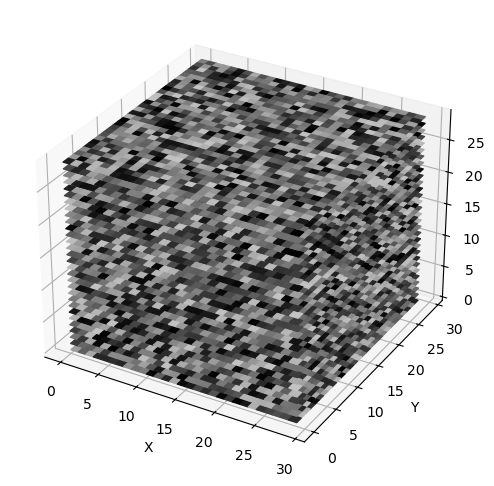

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate a stack of 2D images (grayscale)
num_images = 30
image_size = (30, 30)

# Create random image data
# images = [np.random.rand(*image_size) for _ in range(num_images)]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot each image in the stack at different z-levels
for i, img in enumerate(images):
    X, Y = np.meshgrid(range(image_size[1]), range(image_size[0]))
    Z = np.full_like(X, i)  # Each image at a different Z height
    ax.plot_surface(X, Y, Z, facecolors=plt.cm.gray(img), rstride=1, cstride=1)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Stack Depth")
plt.show()
